In [1]:
import pandas as pd
import glob
import pylab as plt
plt.style.use('bmh')
import geopandas as gp
import xarray as xarr

In [17]:
files = glob.glob('./dap.ceda.ac.uk/neodc/esacci/sst/data/obs4MIPs/UReading/ESA-CCI-SST-v2-1/mon/tos/gn/v20201130/*')
print(files)

['./dap.ceda.ac.uk/neodc/esacci/sst/data/obs4MIPs/UReading/ESA-CCI-SST-v2-1/mon/tos/gn/v20201130/00README_catalogue_and_licence.txt', './dap.ceda.ac.uk/neodc/esacci/sst/data/obs4MIPs/UReading/ESA-CCI-SST-v2-1/mon/tos/gn/v20201130/index.html', './dap.ceda.ac.uk/neodc/esacci/sst/data/obs4MIPs/UReading/ESA-CCI-SST-v2-1/mon/tos/gn/v20201130/tos_mon_ESA-CCI-SST-v2-1_BE_gn_198109-201712.nc', './dap.ceda.ac.uk/neodc/esacci/sst/data/obs4MIPs/UReading/ESA-CCI-SST-v2-1/mon/tos/gn/v20201130/ESACCI-SST-v2.1-technical_note-v1.pdf']


In [18]:
import netCDF4 as nc

In [21]:
ds = nc.Dataset(files[2])

In [22]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 ODS-2.1
    activity_id: obs4MIPs
    contact: Christopher Merchant, University of Reading, U.K. (c.j.merchant@reading.ac.uk)
    creation_date: 2020-11-30T10:55:21Z
    data_specs_version: 2.1.0
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/obs4MIPs.UReading.ESA-CCI-SST.ESA-CCI-SST-v2-1.tos
    grid: 1x1 degree latitude x longitude
    grid_label: gn
    history: 2020-11-30T10:55:21Z; CMOR rewrote data to be consistent with obs4MIPs, and CF-1.7 ODS-2.1 standards
    institution: University of Reading, Reading, U.K.
    institution_id: UReading
    nominal_resolution: 100 km
    product: observations
    realm: ocean
    region: global_ocean
    source: ESA-CCI-SST v2.1 (2019): Sea Surface Temperature (SST) from the European Space Agency Climate Change Initiative (ESA CCI)
    source_id: ESA-CCI-SST-v2-1
    source_label: ESA-CCI-SST
    source

In [23]:
for dim in ds.variables.values():
    print(dim)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1981-01-01
    calendar: gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (436,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (436, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
   

In [24]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 ODS-2.1
    activity_id: obs4MIPs
    contact: Christopher Merchant, University of Reading, U.K. (c.j.merchant@reading.ac.uk)
    creation_date: 2020-11-30T10:55:21Z
    data_specs_version: 2.1.0
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/obs4MIPs.UReading.ESA-CCI-SST.ESA-CCI-SST-v2-1.tos
    grid: 1x1 degree latitude x longitude
    grid_label: gn
    history: 2020-11-30T10:55:21Z; CMOR rewrote data to be consistent with obs4MIPs, and CF-1.7 ODS-2.1 standards
    institution: University of Reading, Reading, U.K.
    institution_id: UReading
    nominal_resolution: 100 km
    product: observations
    realm: ocean
    region: global_ocean
    source: ESA-CCI-SST v2.1 (2019): Sea Surface Temperature (SST) from the European Space Agency Climate Change Initiative (ESA CCI)
    source_id: ESA-CCI-SST-v2-1
    source_label: ESA-CCI-SST
    source

In [27]:
sst = ds['tos']

In [30]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
print(len(lats),len(lons))

180 360


In [34]:
print(len(ds.variables['time'][:]))

436


In [35]:
print(ds.variables['time'][:])

[  258.    288.5   319.    349.5   380.5   410.    439.5   470.    500.5
   531.    561.5   592.5   623.    653.5   684.    714.5   745.5   775.
   804.5   835.    865.5   896.    926.5   957.5   988.   1018.5  1049.
  1079.5  1110.5  1140.5  1170.5  1201.   1231.5  1262.   1292.5  1323.5
  1354.   1384.5  1415.   1445.5  1476.5  1506.   1535.5  1566.   1596.5
  1627.   1657.5  1688.5  1719.   1749.5  1780.   1810.5  1841.5  1871.
  1900.5  1931.   1961.5  1992.   2022.5  2053.5  2084.   2114.5  2145.
  2175.5  2206.5  2236.   2265.5  2296.   2326.5  2357.   2387.5  2418.5
  2449.   2479.5  2510.   2540.5  2571.5  2601.5  2631.5  2662.   2692.5
  2723.   2753.5  2784.5  2815.   2845.5  2876.   2906.5  2937.5  2967.
  2996.5  3027.   3057.5  3088.   3118.5  3149.5  3180.   3210.5  3241.
  3271.5  3302.5  3332.   3361.5  3392.   3422.5  3453.   3483.5  3514.5
  3545.   3575.5  3606.   3636.5  3667.5  3697.   3726.5  3757.   3787.5
  3818.   3848.5  3879.5  3910.   3940.5  3971.   4001.5 

In [36]:
print(lats)

[-89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5
 -77.5 -76.5 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5
 -65.5 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5
 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5
 -41.5 -40.5 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5
 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5
 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5
  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5
   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5
  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5
  30.5  31.5  32.5  33.5  34.5  35.5  36.5  37.5  38.5  39.5  40.5  41.5
  42.5  43.5  44.5  45.5  46.5  47.5  48.5  49.5  50.5  51.5  52.5  53.5
  54.5  55.5  56.5  57.5  58.5  59.5  60.5  61.5  62.5  63.5  64.5  65.5
  66.5  67.5  68.5  69.5  70.5  71.5  72.5  73.5  7

In [37]:
print(lons)

[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 16

<AxesSubplot:>

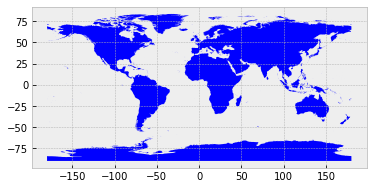

In [38]:
continent = gp.read_file('../Work/Fishing/continent/continent.shp')
continent.plot()

(30.0, 46.0)

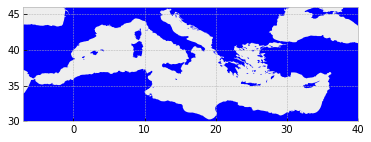

In [44]:
continent.plot()
plt.xlim(-7,40)
plt.ylim(30,46)

In [132]:
#mask covering mediterranean sea
lonsel = [-4.5, -4.5, -3.5, -3.5, -2.5, -2.5, -1.5, -1.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8.5, 8.5, 8.5, 8.5, 8.5, 9.5, 9.5, 9.5, 9.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 21.5, 21.5, 21.5, 21.5, 21.5, 22.5, 22.5, 22.5, 22.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5, 28.5, 28.5, 28.5, 28.5, 28.5, 28.5, 29.5, 29.5, 29.5, 29.5, 29.5, 30.5, 30.5, 30.5, 30.5, 30.5, 31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 32.5, 32.5, 32.5, 32.5, 32.5, 33.5, 33.5, 33.5, 33.5, 33.5, 34.5, 34.5, 34.5, 34.5, 34.5, 35.5, 35.5, 35.5]
latsel = [35.5, 36.5, 35.5, 36.5, 35.5, 36.5, 35.5, 36.5, 36.5, 37.5, 36.5, 37.5, 38.5, 39.5, 37.5, 38.5, 39.5, 40.5, 37.5, 38.5, 40.5, 41.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 37.5, 38.5, 41.5, 42.5, 43.5, 37.5, 38.5, 41.5, 43.5, 34.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 44.5, 45.5, 33.5, 34.5, 35.5, 36.5, 38.5, 39.5, 40.5, 44.5, 45.5, 33.5, 34.5, 35.5, 36.5, 38.5, 39.5, 40.5, 42.5, 43.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 42.5, 43.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 41.5, 42.5, 43.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 41.5, 42.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 41.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 33.5, 34.5, 35.5, 36.5, 37.5, 33.5, 34.5, 35.5, 36.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 39.5, 40.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 31.5, 32.5, 33.5, 34.5, 35.5, 31.5, 32.5, 33.5, 34.5, 35.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 31.5, 32.5, 33.5, 34.5, 35.5, 31.5, 32.5, 33.5, 34.5, 35.5, 32.5, 33.5, 34.5, 35.5, 36.5, 34.5, 35.5, 36.5]
print(len(latsel),len(lonsel))

257 257


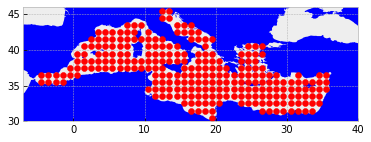

In [133]:
continent.plot()
plt.xlim(-7,40)
plt.ylim(30,46)
plt.scatter(lonsel,latsel,color='r')

In [134]:
lats = list(lats)
lons = list(lons)

In [138]:
losel2 = []
for elem in lonsel:
    lo = elem
    if elem < 0.0:
        lo += 360.0
    losel2.append(lo)
    

In [140]:
idlatsel = [lats.index(elem) for elem in latsel]
idlonsel = [lons.index(elem) for elem in losel2]

In [141]:
import numpy as np

In [143]:
avsst = []
for t in range(len(ds.variables['time'][:])):
    print(t,ds.variables['time'][t])
    values = []
    for la,lo in zip(idlatsel,idlonsel):
        val = sst[t][la][lo]
        if val > 0.0:
            values.append(val)
    print(t,np.mean(values),values[:5])
    avsst.append(np.mean(values))

0 258.0
0 24.21645 [22.237818, 20.899927, 21.630548, 22.004694, 23.02093]
1 288.5
1 22.707567 [20.340479, 18.942133, 19.32937, 18.62417, 21.116175]
2 319.0
2 19.627087 [18.227594, 17.889124, 18.327967, 17.976404, 18.867884]
3 349.5
3 16.769121 [16.61355, 16.140131, 16.578455, 16.017756, 16.745813]
4 380.5
4 15.655258 [16.265863, 16.03744, 16.183496, 15.499964, 16.054316]
5 410.0
5 14.865738 [15.47854, 14.945337, 15.287226, 14.878717, 15.184015]
6 439.5
6 14.620879 [15.87414, 15.44372, 15.760523, 15.440699, 15.763727]
7 470.0
7 15.576402 [16.292017, 15.942713, 16.256037, 16.05285, 16.383417]
8 500.5
8 17.746624 [18.155176, 17.693445, 17.690943, 17.697138, 17.828577]
9 531.0
9 21.974112 [20.120844, 19.230066, 19.976068, 20.006342, 20.860865]
10 561.5
10 24.472763 [20.91833, 18.889704, 20.003778, 19.70669, 21.665552]
11 592.5
11 25.078802 [21.870691, 20.549067, 20.991999, 21.123987, 22.483576]
12 623.0
12 24.28233 [21.29281, 21.311304, 21.927546, 22.042078, 22.40066]
13 653.5
13 22.424452

106 24.516712 [22.227991, 21.65304, 22.280756, 22.584223, 22.86114]
107 3514.5
107 25.572083 [23.776392, 23.270807, 23.969812, 24.377832, 24.535028]
108 3545.0
108 24.417976 [22.866053, 22.420404, 22.925348, 23.026392, 23.895075]
109 3575.5
109 23.064144 [20.971064, 19.66894, 20.610071, 19.792963, 21.584406]
110 3606.0
110 20.481764 [18.583094, 17.698114, 18.297907, 17.590143, 18.736261]
111 3636.5
111 17.581234 [16.649744, 15.977808, 16.35528, 15.563471, 16.25091]
112 3667.5
112 16.060112 [15.739618, 15.451288, 15.434534, 15.059656, 15.311548]
113 3697.0
113 14.95072 [15.127588, 14.702906, 14.996424, 14.641565, 14.688898]
114 3726.5
114 15.080919 [15.337671, 15.019098, 15.173334, 14.91308, 15.06521]
115 3757.0
115 15.705495 [15.605738, 15.424158, 15.606592, 15.383051, 15.785547]
116 3787.5
116 17.052628 [16.742609, 16.465479, 16.727533, 16.532404, 17.13122]
117 3818.0
117 20.649288 [19.860376, 19.168879, 19.87005, 19.63305, 20.257532]
118 3848.5
118 23.835869 [21.929102, 21.096766, 21

211 16.062347 [17.080347, 16.333887, 16.786798, 16.264826, 17.06933]
212 6709.5
212 19.352022 [18.230799, 17.134699, 17.816431, 17.210443, 18.520807]
213 6740.0
213 22.843344 [20.523645, 19.916498, 20.49621, 20.918268, 20.994501]
214 6770.5
214 25.058426 [22.583765, 21.510584, 22.351587, 22.866968, 24.030878]
215 6801.5
215 26.518574 [22.83172, 20.301569, 22.07232, 22.146051, 24.90072]
216 6832.0
216 25.73124 [22.003016, 20.859491, 21.792353, 21.486322, 23.598505]
217 6862.5
217 23.578875 [20.099634, 19.069147, 19.911066, 19.365747, 20.952814]
218 6893.0
218 20.563818 [18.033777, 17.53985, 17.981836, 17.634546, 18.421534]
219 6923.5
219 17.538118 [16.119806, 15.817377, 16.07226, 15.8417, 16.12353]
220 6954.5
220 15.634321 [15.339563, 15.07284, 15.024591, 14.877893, 15.0438175]
221 6984.5
221 14.9114485 [15.717432, 15.589472, 15.482386, 15.475672, 15.463465]
222 7014.5
222 14.907009 [15.89477, 15.813837, 15.834803, 15.809626, 15.893854]
223 7045.0
223 16.061184 [16.34994, 15.817194, 16.

316 15.913099 [16.135431, 16.022638, 16.030024, 15.871332, 15.864038]
317 9906.5
317 15.259898 [15.890314, 15.7217045, 15.646936, 15.61059, 15.64477]
318 9936.5
318 15.4365635 [16.4125, 16.101007, 16.208643, 15.887842, 16.029444]
319 9967.0
319 16.336256 [16.865839, 16.365381, 16.635553, 16.112787, 16.894587]
320 9997.5
320 18.9782 [17.972284, 16.892176, 17.572412, 17.144617, 18.000269]
321 10028.0
321 22.697561 [20.612146, 19.661676, 20.45437, 20.552637, 21.089136]
322 10058.5
322 25.541616 [22.004877, 21.244318, 22.31695, 22.476831, 23.449518]
323 10089.5
323 26.347395 [23.424128, 22.141474, 22.870356, 24.11239, 25.033503]
324 10120.0
324 25.406822 [22.547205, 20.94604, 22.208155, 21.73855, 23.664759]
325 10150.5
325 22.597713 [19.46206, 19.484339, 19.79156, 19.897211, 20.454828]
326 10181.0
326 20.399664 [17.474878, 17.163874, 17.614435, 17.237513, 18.010157]
327 10211.5
327 17.509321 [15.6731205, 15.167749, 15.70849, 15.08877, 15.692255]
328 10242.5
328 15.866652 [15.0758, 14.51061

419 26.096684 [23.20846, 23.152308, 23.6513, 23.951777, 24.16186]
420 13042.0
420 25.607515 [23.292109, 22.122766, 23.178644, 22.93316, 24.131128]
421 13072.5
421 23.528826 [21.033686, 20.058924, 20.9956, 21.000177, 21.478998]
422 13103.0
422 20.832293 [18.18075, 17.991571, 18.652887, 18.207972, 18.81228]
423 13133.5
423 18.252804 [17.092035, 16.717127, 17.009089, 16.805079, 16.767603]
424 13164.5
424 16.040716 [15.960077, 15.847712, 15.913538, 15.899927, 15.879206]
425 13194.0
425 15.346098 [15.621485, 15.326563, 15.463221, 15.270685, 15.257929]
426 13223.5
426 15.742454 [16.016352, 15.745661, 15.958399, 15.786432, 15.930994]
427 13254.0
427 16.874945 [16.82583, 16.645075, 16.87176, 16.819971, 16.98849]
428 13284.5
428 19.490726 [18.806849, 18.282831, 18.716486, 18.388575, 19.049982]
429 13315.0
429 23.657133 [22.260706, 21.21612, 22.26333, 22.133509, 22.5841]
430 13345.5
430 25.829124 [23.050257, 21.472925, 22.63064, 22.29339, 23.855585]
431 13376.5
431 26.809134 [23.378687, 23.14553

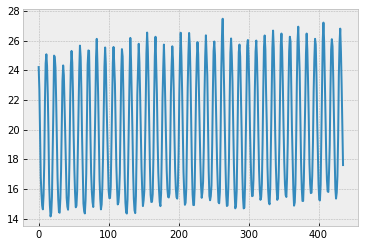

In [144]:
plt.plot(avsst)

In [145]:
#primer dato es el de octubre de 1981(entrada 0)
#noviembre 81: 1, dic 81: 2, jan 82: 3, dec 82: 14
#años: del 82 al 17 -> un total de 36 años
tmax= []
tmin = []
for i in range(36):
    samp = avsst[3+12*i:3+12*(i+1)]
    tmax.append(np.amax(samp))
    tmin.append(np.amin(samp))

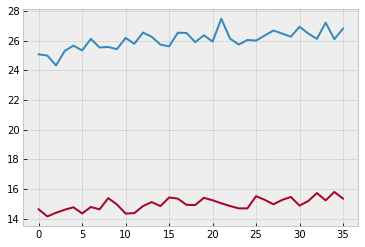

In [146]:
plt.plot(tmax)
plt.plot(tmin)

In [147]:
import matplotlib.colors as colors
cmap = plt.get_cmap('coolwarm')

In [148]:
cnorm = colors.Normalize(vmin = np.amin(tmin), vmax = np.amax(tmax))

In [149]:
from shapely.geometry import Polygon as polygon

In [150]:
# fig = plt.figure(figsize=(12,12))
pols = []
cs = []
vals = []
for i in range(len(tmax)):
    T = tmax[i]
    t = tmin[i]
    for ix in range(1500):
        val = 13.0+0.01*ix
        if val > t and val < T:
            pols.append(polygon([(i-0.5,val),(i-0.5,val+0.01),(i+0.5,val+0.01),(i+0.5,val)]))
            cs.append(cmap(cnorm(val)))
            vals.append(val)
            

In [151]:
geoaux = gp.GeoDataFrame({'col':cs,'val':vals},geometry=pols)

In [152]:
print(len(geoaux))

39845


<AxesSubplot:>

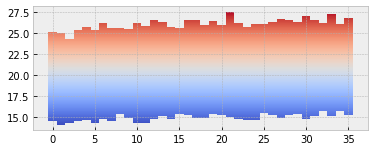

In [153]:
geoaux.plot(column='val',cmap=cmap,norm=cnorm)

In [154]:
print(np.amin(tmin),np.amax(tmax))

14.142765 27.476616


In [155]:
print(len(tmax))

36


(-0.5, 35.5, 10.0, 30.0)

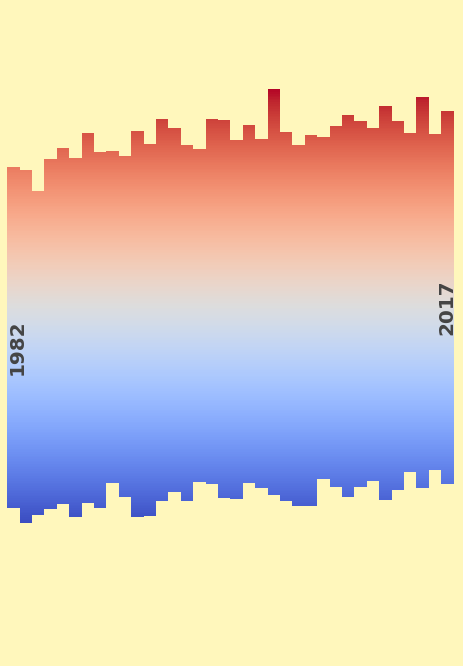

In [168]:
fig = plt.figure(figsize=(8,12))
fig.set_facecolor('#fff7bc')
ax = plt.gca()
ax.set_facecolor('#fff7bc')
plt.ylim(12-2,28+2)
plt.xlim(-0.5,35.5)
# plt.plot(tmax,color='k')
# plt.plot(tmin,color='k')
geoaux.plot(ax=ax,column='val',cmap=cmap,norm=cnorm,aspect=None)

ax.grid(False)
plt.xticks([])
plt.yticks([])
plt.text(-0.5,(tmin[0]+tmax[0])/2-1,'1982',rotation=90,color='#444444',size=20,weight='bold')
plt.text(34.2,(tmin[-1]+tmax[-1])/2-1,'2017',rotation=90,color='#444444',size=20,weight='bold')
ax.axis('off')
# ax.set_position([0,0,1,0.5])

In [169]:
fig.savefig('mediterranean_temprange_monthly.png',bbox_inches='tight',dpi=300)